In [ ]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


# **Praktikum 11**

In [ ]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/gdive/MyDrive/Machine Learning Sem3/Praktikum11/Data/Iris.csv')

# cetak header data (5 baris data) dari file
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

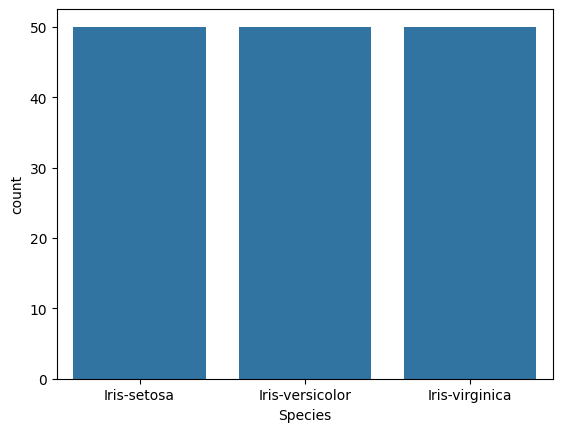

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Species", data=df)
plt.show()

In [ ]:
X = df.drop(["Id", "Species"], axis=1)

In [ ]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

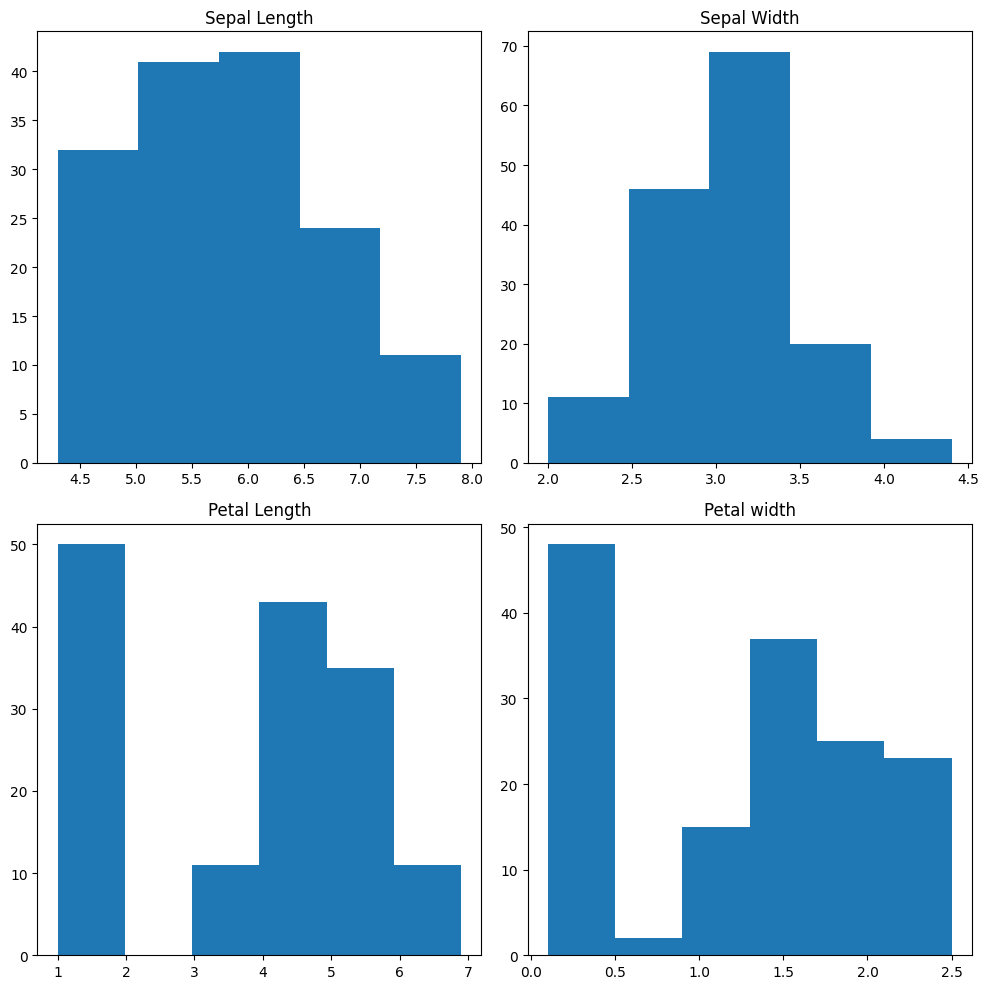

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Histogram 1: Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X['SepalLengthCm'], bins=5)

#Histogram 2: Sepal width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X['SepalWidthCm'], bins=5)

#Histogram 3: Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X['PetalLengthCm'], bins=6)

#Histogram 4: Petal width
axes[1, 1].set_title("Petal width")
axes[1, 1].hist(X['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

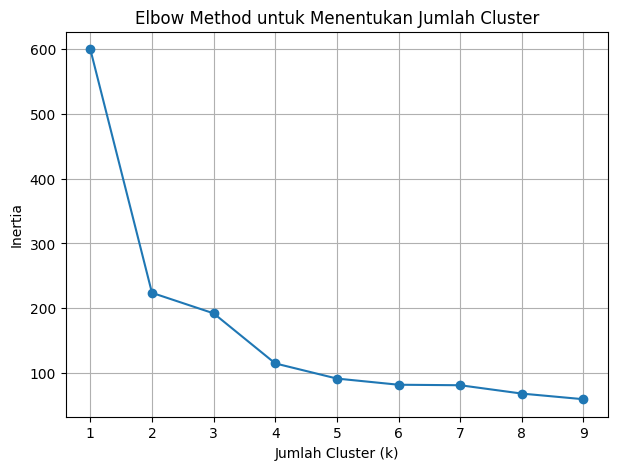

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.predict(X)

In [ ]:
df["Cluster"] = labels

In [ ]:
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n ===== SILHOUETTE SCORE ===== ")
print("Silhouette Score:", sil_score)


 ===== SILHOUETTE SCORE ===== 
Silhouette Score: 0.4787241921049546


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

print("\n ===== CONFUSION MATRIX ===== ")

# Encode the 'Species' column to numerical labels for comparison
le = LabelEncoder()
y_true = le.fit_transform(df["Species"])
y_pred = df["Cluster"]

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


 ===== CONFUSION MATRIX ===== 
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


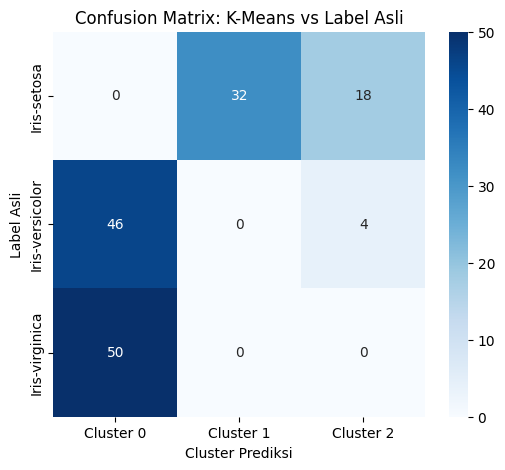

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt. show()

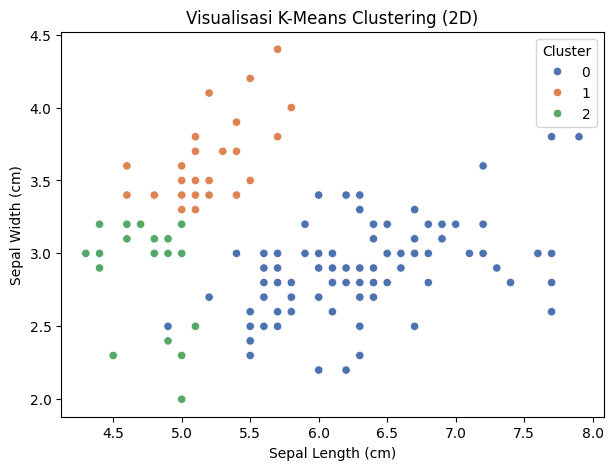

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep")

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt. show()

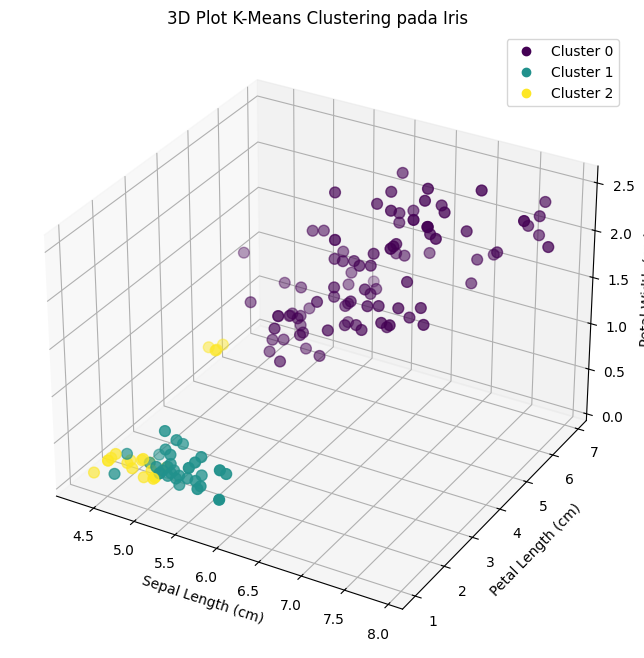

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d' )

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60) # Changed 'S' to 's' for marker size

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements() [0], labels=legend_labels)

plt.show()

# **Tugas 11**

In [ ]:
!pip install folium

In [ ]:
!pip install contextily

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import wkt

In [ ]:
df1 = pd.read_csv("/content/gdive/MyDrive/Machine Learning Sem3/Praktikum11/Data/airport_code.csv")
df1.head()

id ident           type                                name  \
0    6523   00A       heliport                   Total Rf Heliport   
1  323361  00AA  small_airport                Aero B Ranch Airport   
2    6524  00AK  small_airport                        Lowell Field   
3    6525  00AL  small_airport                        Epps Airpark   
4    6526  00AR         closed  Newport Hospital & Clinic Heliport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0     40.070801     -74.933601          11.0       NaN          US      US-PA   
1     38.704022    -101.473911        3435.0       NaN          US      US-KS   
2     59.949200    -151.695999         450.0       NaN          US      US-AK   
3     34.864799     -86.770302         820.0       NaN          US      US-AL   
4     35.608700     -91.254898         237.0       NaN          US      US-AR   

   municipality scheduled_service gps_code local_code  
0      Bensalem                no      00A        00A  
1         Leoti                no     00AA       00AA  
2  Anchor Point                no     00AK       00AK  
3       Harvest                no     00AL       00AL  
4       Newport                no      NaN        NaN

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58505 entries, 0 to 58504
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 58505 non-null  int64  
 1   ident              58505 non-null  object 
 2   type               58505 non-null  object 
 3   name               58505 non-null  object 
 4   latitude_deg       58505 non-null  float64
 5   longitude_deg      58505 non-null  float64
 6   elevation_ft       50054 non-null  float64
 7   continent          29530 non-null  object 
 8   iso_country        58259 non-null  object 
 9   iso_region         58505 non-null  object 
 10  municipality       52634 non-null  object 
 11  scheduled_service  58505 non-null  object 
 12  gps_code           41709 non-null  object 
 13  local_code         30482 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 6.2+ MB


In [ ]:
df1.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft          8451
continent            28975
iso_country            246
iso_region               0
municipality          5871
scheduled_service        0
gps_code             16796
local_code           28023
dtype: int64

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
import folium
from folium.plugins import HeatMap

# Buat peta dasar USA (koordinat tengah USA)
peta_us = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Buat list data [lat, long] untuk heatmap (hanya koordinat)
data_heatmap = df1[['latitude_deg','longitude_deg']].values.tolist()

# Tambahkan heatmap ke peta USA
HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_us)

# Tampilkan peta
peta_us

Top 5 Negara dengan Elevasi Rata-rata Tertinggi:
iso_country
BT    6687.400000
LS    6576.090909
RW    5189.625000
ET    4936.192982
AF    4908.650794
Name: elevation_ft, dtype: float64

Bottom 5 Negara dengan Elevasi Rata-rata Terendah:
iso_country
MF    3.500000
KY    6.333333
TC    8.500000
IO    9.000000
KI    9.000000
Name: elevation_ft, dtype: float64


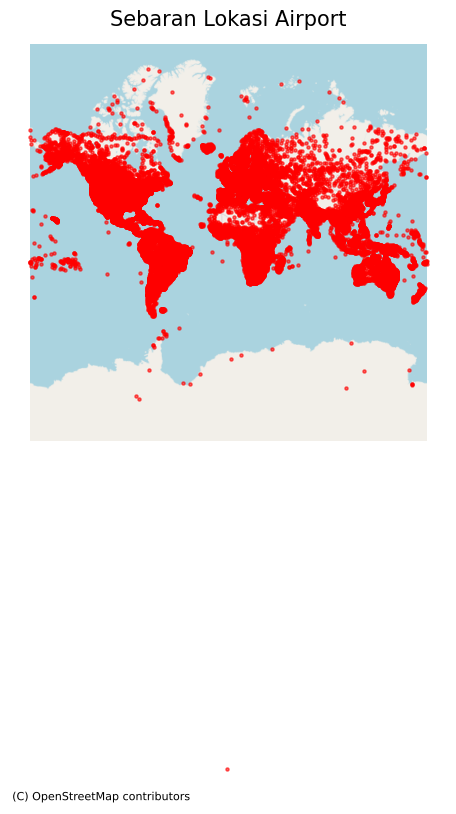

In [ ]:
# Ambil koordinat long–lat dari dataset airport
np.random.seed(42)
long_peta = df1['longitude_deg'] + np.random.uniform(-0.05, 0.05, size=len(df1))
lat_peta = df1['latitude_deg'] + np.random.uniform(-0.05, 0.05, size=len(df1))

# Konversi menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(
    df1,
    geometry=gpd.points_from_xy(long_peta, lat_peta),
    crs='EPSG: 4326'   # WGS84
)

# Proyeksi ke Web Mercator untuk keperluan plotting peta dasar
gdf = gdf.to_crs(epsg=3857)

if 'elevation_ft' in df1.columns:
    elevasi = df1.groupby("iso_country")["elevation_ft"].mean()

    top_5 = elevasi.sort_values(ascending=False).head(5)
    bottom_5 = elevasi.sort_values().head(5)

    print("Top 5 Negara dengan Elevasi Rata-rata Tertinggi:")
    print(top_5)
    print("\nBottom 5 Negara dengan Elevasi Rata-rata Terendah:")
    print(bottom_5)
else:
    print("⚠ Kolom 'elevation_ft' tidak tersedia pada dataset. Pilih kolom lain.")

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    ax=ax,
    color='red',
    markersize=5,
    alpha=0.6
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Sebaran Lokasi Airport", fontsize=15)
ax.set_axis_off()
plt.show()

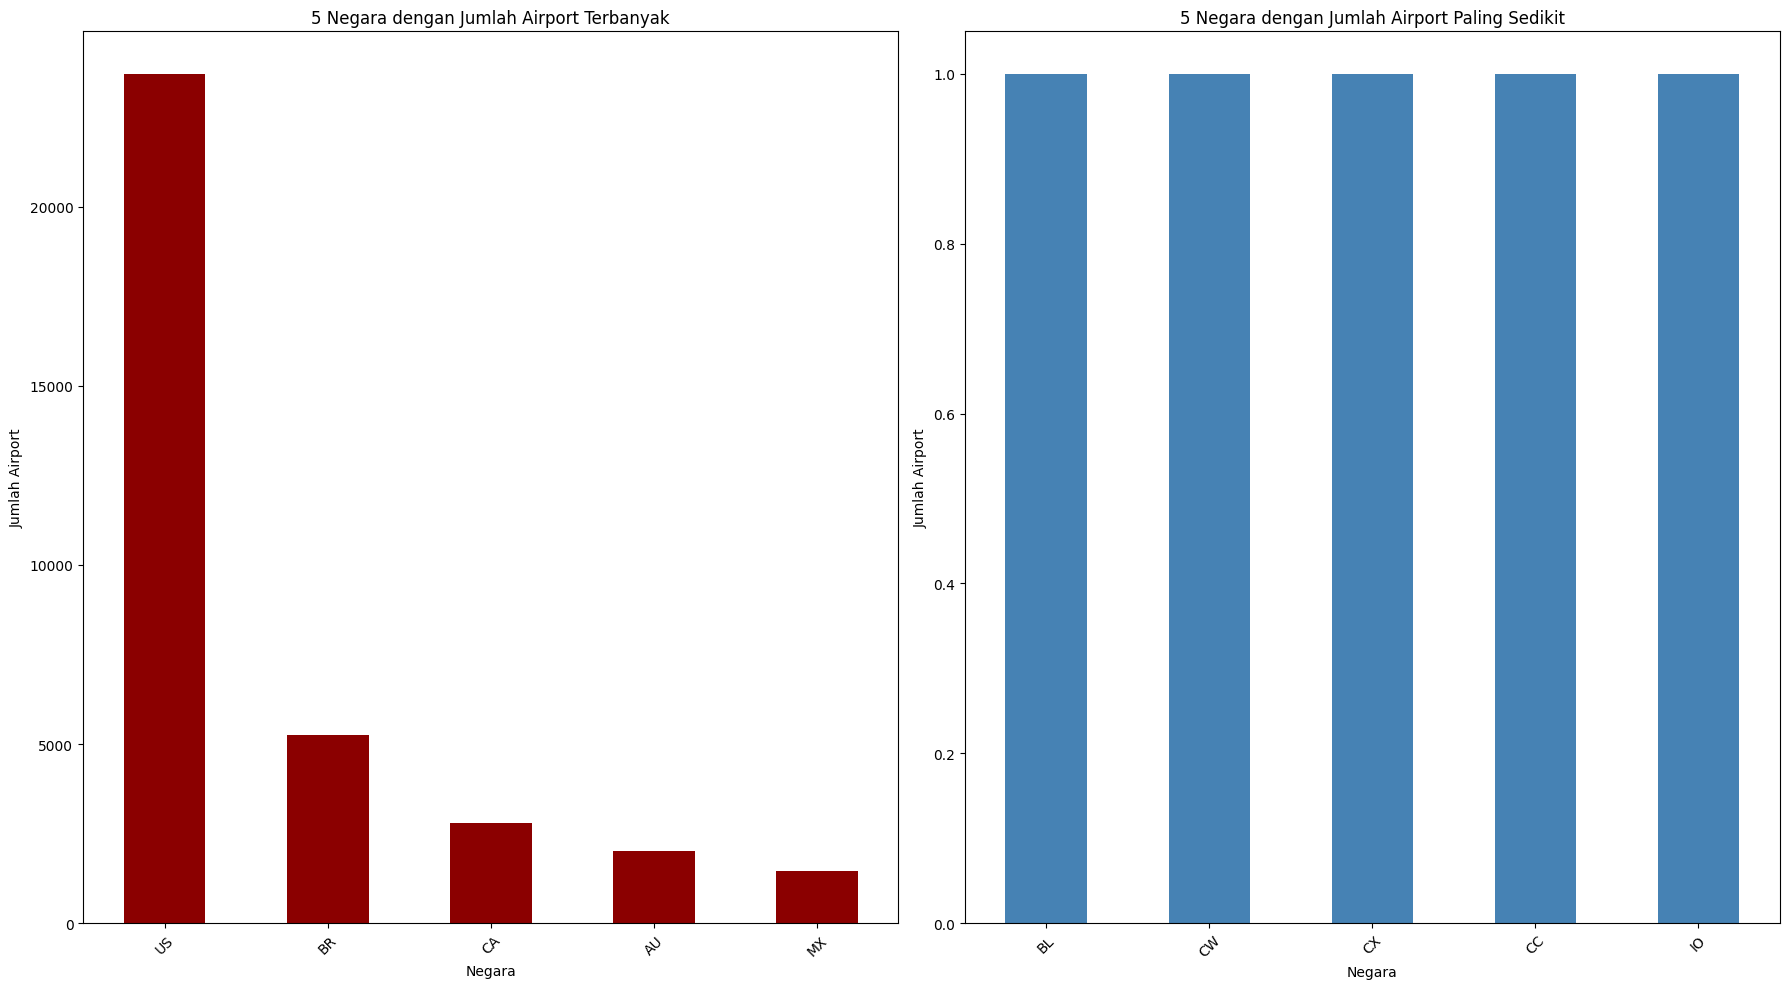

In [70]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# --- GROUPING DATA ---
airport_count = df1.groupby("iso_country")["name"].count()

top_5 = airport_count.sort_values(ascending=False).head(5)
bottom_5 = airport_count.sort_values().head(5)

# --- LAYOUT GRID ---
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# --- LEFT PLOT: TOP 5 ---
ax_top = plt.subplot(gs[0, 0])
top_5.plot(kind='bar', ax=ax_top, color='darkred')
ax_top.set_title("5 Negara dengan Jumlah Airport Terbanyak")
ax_top.set_ylabel("Jumlah Airport")
ax_top.set_xlabel("Negara")
ax_top.tick_params(axis='x', rotation=45)

# --- RIGHT PLOT: BOTTOM 5 ---
ax_bottom = plt.subplot(gs[0, 1])
bottom_5.plot(kind='bar', ax=ax_bottom, color='steelblue')
ax_bottom.set_title("5 Negara dengan Jumlah Airport Paling Sedikit")
ax_bottom.set_ylabel("Jumlah Airport")
ax_bottom.set_xlabel("Negara")
ax_bottom.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [62]:
df1.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'local_code',
       'lat_jitter', 'long_jitter'],
      dtype='object')

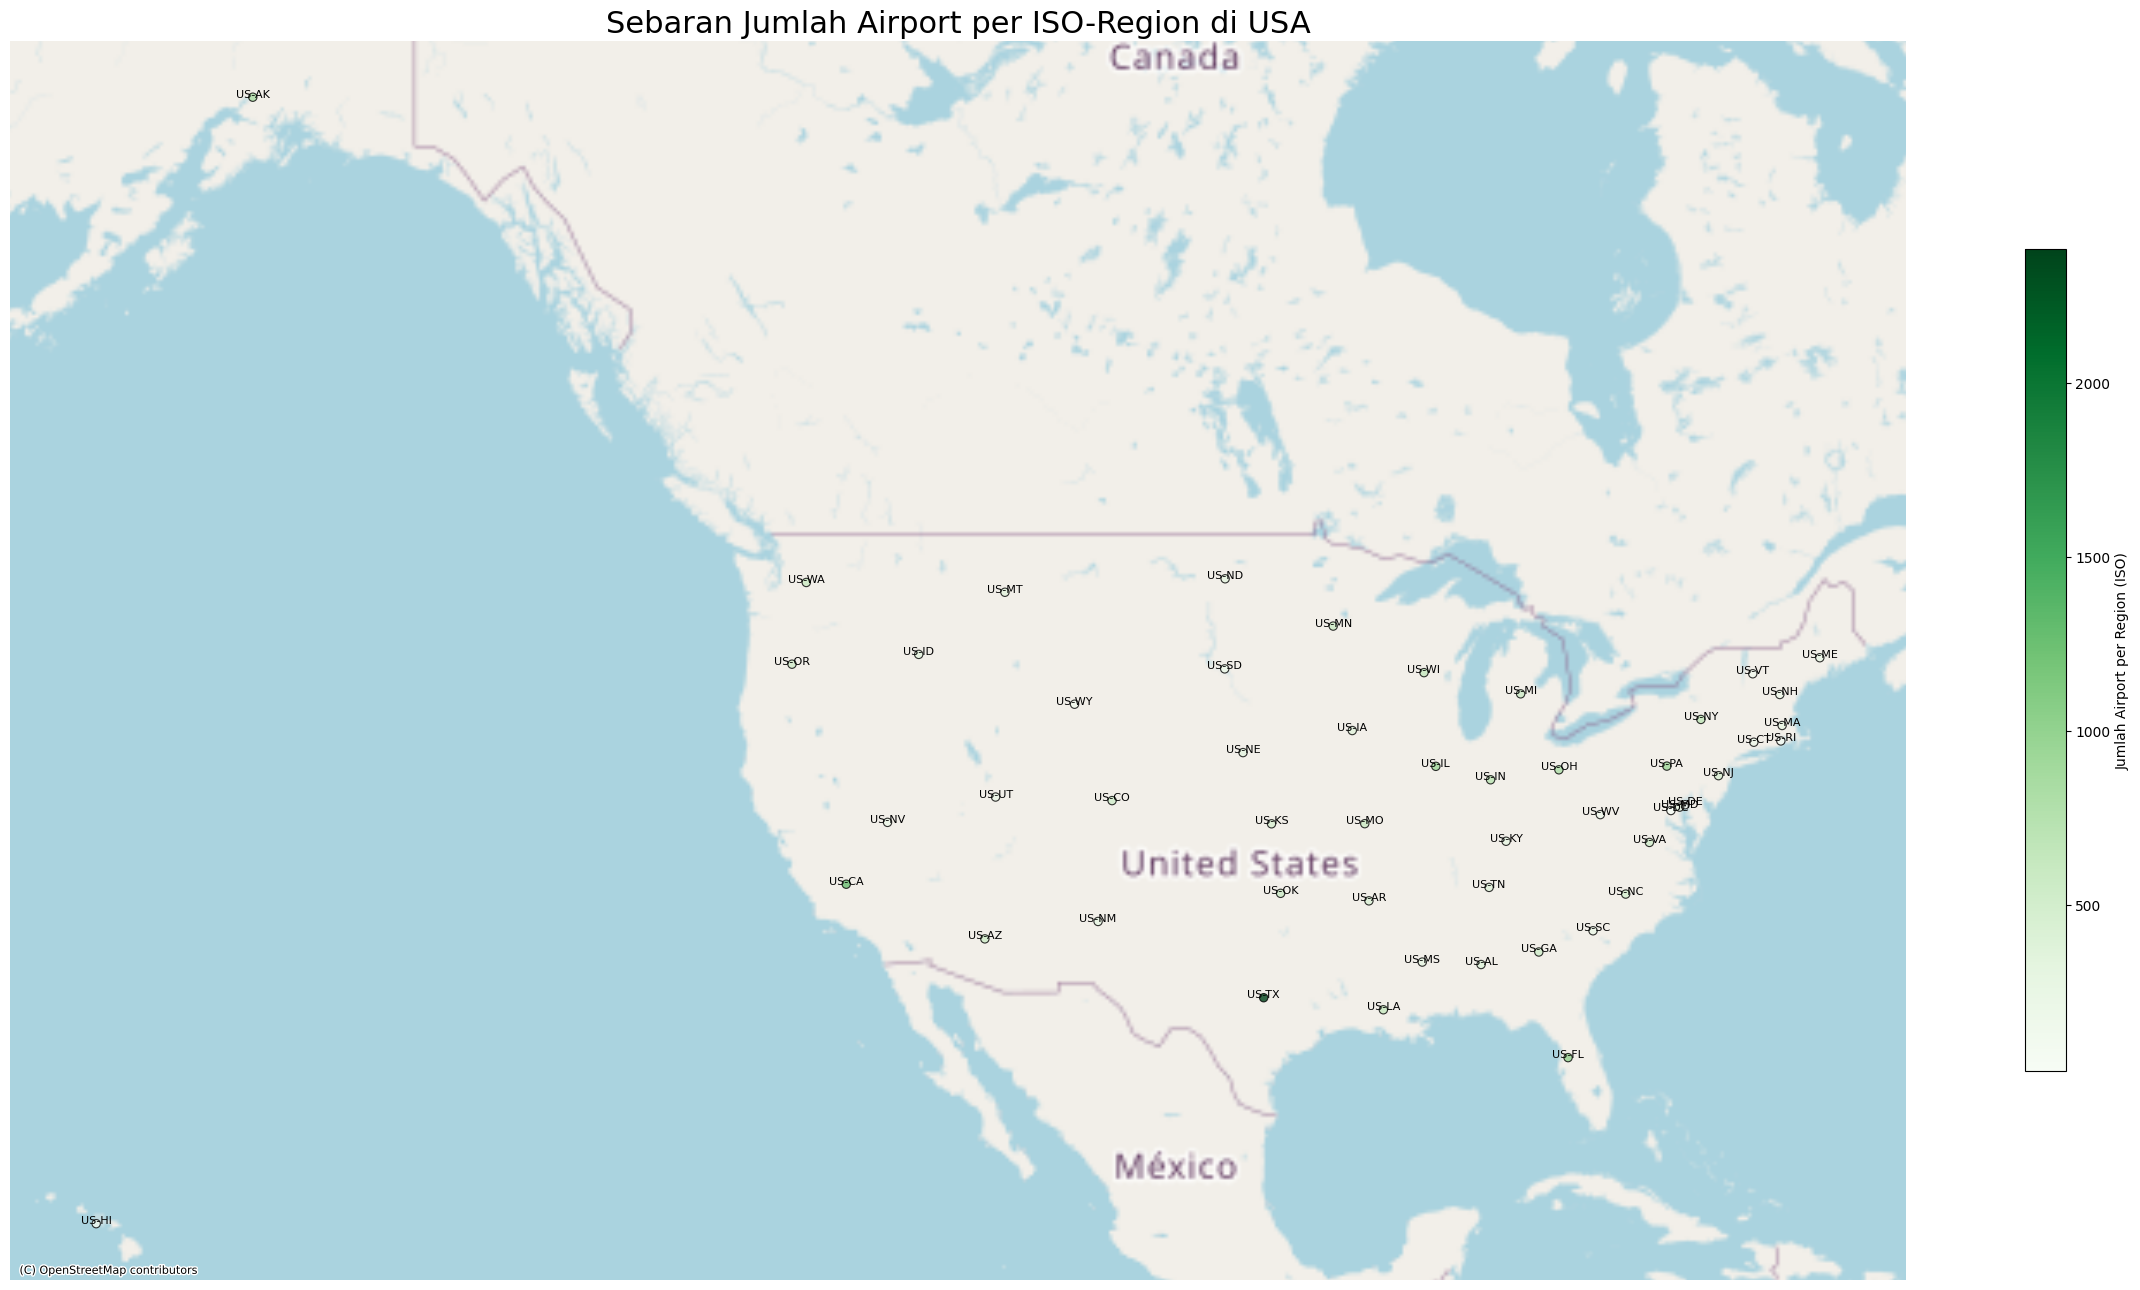

In [124]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Hanya ambil airport US
df1 = df1[df1['iso_country'] == 'US']

# Buang baris tanpa lat/long
df1 = df1.dropna(subset=['latitude_deg', 'longitude_deg'])

rata_rata_count = df1.groupby('iso_region')['ident'].count().reset_index()
rata_rata_count.columns = ['iso_region', 'airport_count']

unique_region = (
    df1[['iso_region', 'latitude_deg', 'longitude_deg']]
    .groupby('iso_region')
    .mean()
    .reset_index()
)

gdf_skor = unique_region.merge(rata_rata_count, on='iso_region', how='left')

gdf_skor['geometry_region'] = gdf_skor.apply(
    lambda row: Point(row['longitude_deg'], row['latitude_deg']), axis=1
)

# Konversi ke GeoDataFrame
gdf_skor = gpd.GeoDataFrame(
    gdf_skor,
    geometry='geometry_region',
    crs="EPSG:4326"
)

# Proyeksi ke Web Mercator
gdf_skor = gdf_skor.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24, 14))

gdf_skor.plot(
    column='airport_count',
    cmap='Greens',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    alpha=0.8,
    ax=ax,
    legend_kwds={
        'label': 'Jumlah Airport per Region (ISO)',
        'orientation': 'vertical',
        'shrink': 0.6,
        'aspect': 20
    }
)

# Tambah basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

for idx, row in gdf_skor.iterrows():
    if row['geometry_region'].is_empty:
        continue

    cx = row['geometry_region'].centroid.x
    cy = row['geometry_region'].centroid.y

    plt.annotate(
        text=str(row['iso_region']),
        xy=(cx, cy),
        ha='center',
        fontsize=8,
        color='black'
    )

ax.set_title("Sebaran Jumlah Airport per ISO-Region di USA", fontsize=22)
ax.axis('off')
plt.tight_layout()
plt.show()

In [80]:
from scipy.stats import shapiro

normalityTest_df = df1.drop(columns= ['ident', 'type', 'name', 'continent', 'iso_country','iso_region', 'municipality', 'scheduled_service','gps_code', 'local_code'])

normalityTest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23704 entries, 0 to 58320
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23704 non-null  int64  
 1   latitude_deg   23704 non-null  float64
 2   longitude_deg  23704 non-null  float64
 3   elevation_ft   22976 non-null  float64
 4   lat_jitter     23704 non-null  float64
 5   long_jitter    23704 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.3 MB


In [84]:
from scipy.stats import shapiro

numeric_cols = ['elevation_ft']

for col in numeric_cols:
    print("Kolom:", col)

    # ambil sample max 5000 (aturan Shapiro)
    data_sample = df1[col].dropna()
    if len(data_sample) > 5000:
        data_sample = data_sample.sample(5000, random_state=42)

    stat, p = shapiro(data_sample)

    print("Statistik:", stat)
    print("P-value:", p)

    if p > 0.05:
        print("Data berdistribusi normal (gagal tolak H0)\n")
    else:
        print("Data TIDAK berdistribusi normal (tolak H0)\n")

Kolom: elevation_ft
Statistik: 0.7039339756259142
P-value: 3.1503422051040627e-69
Data TIDAK berdistribusi normal (tolak H0)



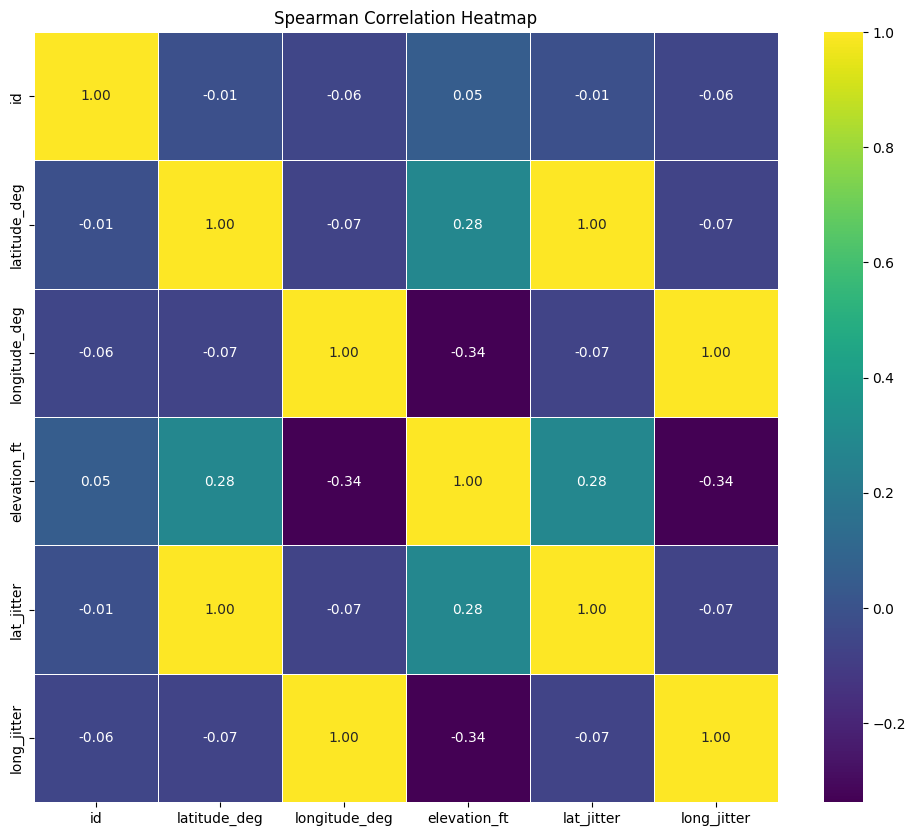

In [85]:
correlation_df = normalityTest_df

correlation_matrix = correlation_df.corr(method='spearman' )

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

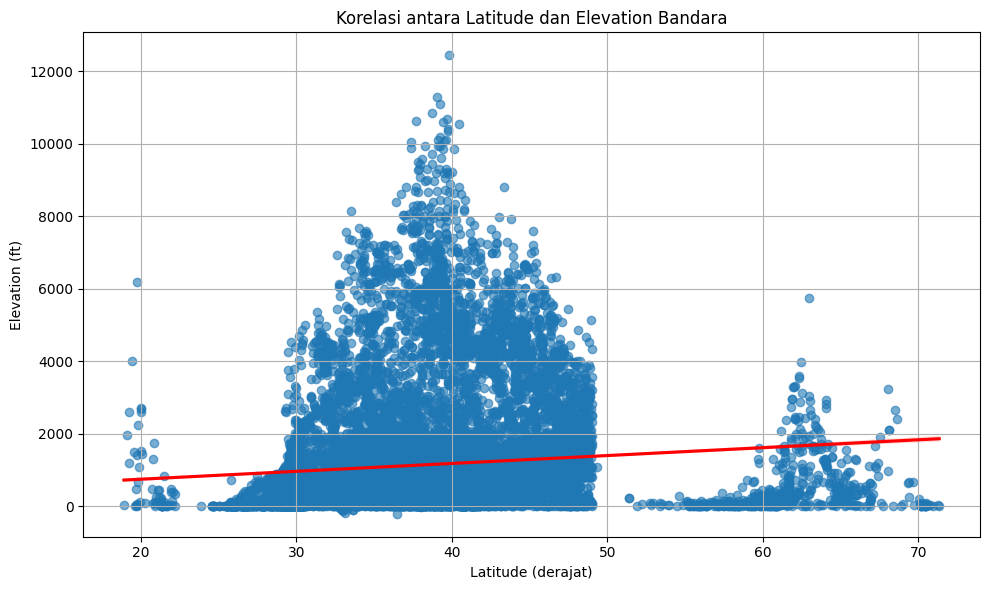

In [86]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="latitude_deg",
    y="elevation_ft",
    data=df1,
    scatter_kws={'alpha': 0.6},
    line_kws={"color": "red"}
)

plt.title("Korelasi antara Latitude dan Elevation Bandara")
plt.xlabel("Latitude (derajat)")
plt.ylabel("Elevation (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
normalisasi_df = df1.drop(columns= ['ident', 'type', 'name', 'continent', 'iso_country','iso_region', 'municipality', 'scheduled_service','gps_code', 'local_code'])

normalisasi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23704 entries, 0 to 58320
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23704 non-null  int64  
 1   latitude_deg   23704 non-null  float64
 2   longitude_deg  23704 non-null  float64
 3   elevation_ft   22976 non-null  float64
 4   lat_jitter     23704 non-null  float64
 5   long_jitter    23704 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.3 MB


In [88]:
from sklearn.preprocessing import RobustScaler

column_names = normalisasi_df.columns
scaler = RobustScaler()
normalisasi_df = scaler.fit_transform(normalisasi_df)
normalisasi_df = pd.DataFrame(normalisasi_df, columns=column_names)
normalisasi_df.head()

id  latitude_deg  longitude_deg  elevation_ft  lat_jitter  \
0  -0.942328      0.103772       0.844579     -0.765445    0.102495   
1  25.723610     -0.058815      -0.481721      2.819895   -0.052894   
2  -0.942243      2.468439      -2.991469     -0.305759    2.466188   
3  -0.942159     -0.515516       0.253063      0.081675   -0.512766   
4  -0.942075     -0.427024       0.028954     -0.528796   -0.429724   

   long_jitter  
0     0.846218  
1    -0.480508  
2    -2.993385  
3     0.255124  
4     0.029044

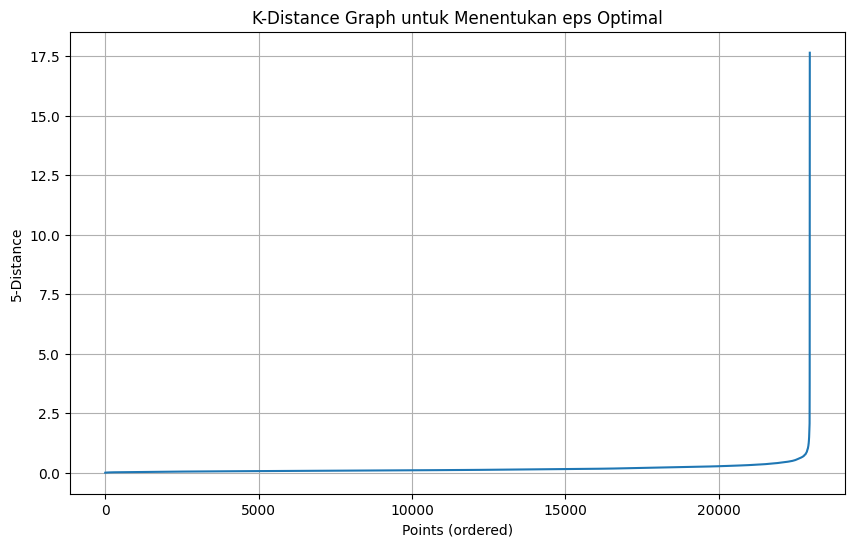

In [92]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Gunakan data hasil normalisasi
X = normalisasi_df.dropna().values

# Tentukan jumlah tetangga (min_samples biasanya = 4-10)
k = 5

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ambil jarak tetangga ke-k (k-distance)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.title("K-Distance Graph untuk Menentukan eps Optimal")
plt.ylabel(f"{k}-Distance")
plt.xlabel("Points (ordered)")
plt.grid(True)
plt.show()

In [96]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=5)
labels = dbscan.fit_predict(X)
labels_series = pd.Series(labels, index=normalisasi_df.dropna().index)

df1['Cluster_DBSCAN'] = labels_series
df1['Cluster_DBSCAN'] = df1['Cluster_DBSCAN'].fillna(-1).astype(int)

print(df1["Cluster_DBSCAN"].value_counts())

Cluster_DBSCAN
-1    11872
 0    11125
 1      703
 2        3
 3        1
Name: count, dtype: int64


In [98]:
from sklearn.metrics import silhouette_score

mask = labels != -1 # hilangkan noise
score = silhouette_score(X[mask], labels[mask])

print("Silhouette Score:", score)

Silhouette Score: 0.5197814037539941


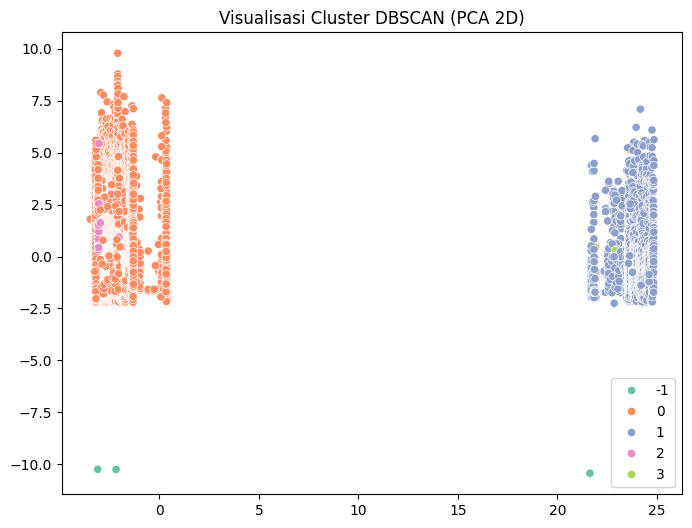

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Use the 'X' variable which was created with .dropna() to handle NaNs
reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=labels, palette="Set2")
plt.title("Visualisasi Cluster DBSCAN (PCA 2D)")
plt.show()

In [103]:
def klasifikasi_db(x):
    if x == 0:
        return "Baik"
    elif x == -1:
        return "Noise"
    else:
        return "Kurang"

df1['Klasifikasi_DBSCAN' ] = df1['Cluster_DBSCAN'].apply(klasifikasi_db) # Changed df to df1

print(df1['Klasifikasi_DBSCAN' ].value_counts())

Klasifikasi_DBSCAN
Noise     11872
Baik      11125
Kurang      707
Name: count, dtype: int64


In [107]:
cluster_summary_db = df1.drop(columns=['ident', 'type', 'name', 'continent', 'iso_country','iso_region', 'municipality', 'scheduled_service','gps_code', 'local_code']).groupby('Klasifikasi_DBSCAN' ).mean()

cluster_summary_db

id  latitude_deg  longitude_deg  elevation_ft  \
Klasifikasi_DBSCAN                                                            
Baik                24527.085753     38.906206     -94.721146   1118.132693   
Kurang              35324.151344     35.857647     -92.601281    691.217949   
Noise               72490.032177     39.155547     -95.910561   1227.417134   

                    lat_jitter  long_jitter  Cluster_DBSCAN  
Klasifikasi_DBSCAN                                           
Baik                 38.905845   -94.720989        0.000000  
Kurang               35.856874   -92.601514        1.007072  
Noise                39.155396   -95.910496       -1.000000

In [120]:
df1_clean = df1[df1['elevation_ft'].notna()].reset_index(drop=True)

# X juga reset index agar urut rapi
X = normalisasi_df.dropna().reset_index(drop=True)

In [121]:
df_pca_db = pd.DataFrame(reduced, columns=["PCA 1", "PCA 2"])
df_pca_db["Klasifikasi_DBSCAN"] = dbscan.labels_
df_pca_db["elevation_ft"] = df1_clean["elevation_ft"].values
df_pca_db["Airport_Name"] = df1_clean["name"].values

In [122]:
fig = px.scatter(
    df_pca_db,
    x="PCA 1",
    y="PCA 2",
    color="Klasifikasi_DBSCAN",
    hover_name="Airport_Name",
    hover_data=["elevation_ft"],
    title="Persebaran Cluster DBSCAN (PCA 2D)",
    width=1500,
    height=900
)
fig.show()